# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

import numpy as np

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


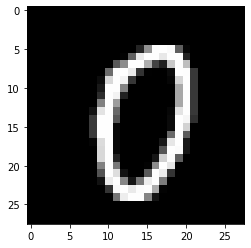

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train_1 = X_train[y_train < 5]
X_test_1 = X_test[y_test < 5]
X_train_2 = X_train[y_train >= 5]
X_test_2 = X_test[y_test >= 5]

In [5]:
# y_train[y_train < 5]
np.nonzero(y_train < 5)

(array([    1,     2,     3, ..., 59991, 59994, 59996]),)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [6]:
print(f'Shape of X_train_1(0-4): {X_train_1.shape}\nShape of X_train_2(5-9): {X_train_2.shape}\n\nShape of X_test_1(0-4): {X_test_1.shape}\nShape of X_test_2(5-9): {X_test_2.shape}\n')

Shape of X_train_1(0-4): (30596, 28, 28)
Shape of X_train_2(5-9): (29404, 28, 28)

Shape of X_test_1(0-4): (5139, 28, 28)
Shape of X_test_2(5-9): (4861, 28, 28)



## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train_1 = X_train_1.reshape(X_train_1.shape[0], img_rows, img_cols, 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], img_rows, img_cols, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [8]:
X_train_1 = X_train_1.astype('float32')
X_test_1 = X_test_1.astype('float32')

#Normalizing the input
X_train_1 /= 255
X_test_1 /= 255

print(f'X_train_1 shape (0-4): {X_train_1.shape}\nX_test_1 shape (0-4): {X_test_1.shape}')


X_train_1 shape (0-4): (30596, 28, 28, 1)
X_test_1 shape (0-4): (5139, 28, 28, 1)


### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [9]:
print(f'Shape of X_train from first set is {X_train_1.shape}\nNumber of images in X_train: {X_train_1.shape[0]}\nNumber of images in X_test: {X_test_1.shape[0]}')

Shape of X_train from first set is (30596, 28, 28, 1)
Number of images in X_train: 30596
Number of images in X_test: 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import keras
y_train_1 = keras.utils.to_categorical(y_train[y_train<5], 5)
y_test_1 = keras.utils.to_categorical(y_test[y_test<5], 5)

In [11]:
print(f'Total number of Train values: {len(y_train_1)}\nTotal number of Test values: {len(y_test_1)}')

Total number of Train values: 30596
Total number of Test values: 5139


## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [12]:
input_shape = (28, 28, 1)
#Initialize the model
model = keras.models.Sequential()

#Add 2 Convolutional Layers with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(keras.layers.Dropout(0.2,name='drop_1'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Flatten the layer
model.add(keras.layers.Flatten())

In [0]:
#Add 2 Dense Layers with 128 units and activation function as 'ReLU' for First layer and 'Softmax' for second one
#Optional dropout layer in between
model.add(keras.layers.Dense(128, activation='relu',name='dense_1'))

model.add(keras.layers.Dropout(0.5,name='drop_2'))

model.add(keras.layers.Dense(5, activation='softmax',name='dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [15]:
from keras.losses import categorical_crossentropy

#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [16]:
model.fit(X_train_1, y_train_1,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_1, y_test_1))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/10





30596/30596 [==============================] - 5s 166us/step - loss: 0.6163 - acc: 0.8017 - val_loss: 0.1236 - val_acc: 0.9644
Epoch 2/10
30596/30596 [==============================] - 2s 57us/step - loss: 0.1911 - acc: 0.9423 - val_loss: 0.0876 - val_acc: 0.9743
Epoch 3/10
30596/30596 [==============================] - 2s 57us/step - loss: 0.1587 - acc: 0.9528 - val_loss: 0.1497 - val_acc: 0.9432
Epoch 4/10
30596/30596 [==============================] - 2s 57us/step - loss: 0.1430 - acc: 0.9565 - val_loss: 0.0676 - val_acc: 0.9794
Epoch 5/10
30596/30596 [==============================] - 2s 58us/step - loss: 0.1270 - acc: 0.9606 - val_loss: 0.0584 - val_acc: 0.9805
Epoch 6/10
30596/30596 [==============================] - 2s 57us/step - loss: 0.1188 - acc: 0.9640 - val_loss: 0.0555 - val_acc: 0.9827
Epoch 7/10
30596/30596 [==

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [17]:
score = model.evaluate( X_test_1, y_test_1)

5139/5139 [==============================] - 0s 57us/step


In [18]:
print(f'Accuracy of the model is: {score}')

Accuracy of the model is: [0.044364109900215505, 0.9867678537492183]


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train_2 = y_train[y_train >= 5] - 5
y_test_2 = y_test[y_test >= 5] - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_2 = X_train_2.reshape(X_train_2.shape[0], img_rows, img_cols, 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], img_rows, img_cols, 1)

In [22]:
print(X_train_2.shape)
print(X_test_2.shape)

(29404, 28, 28, 1)
(4861, 28, 28, 1)


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train_2 = X_train_2.astype('float32')
X_test_2 = X_test_2.astype('float32')
X_train_2 /= 255
X_test_2 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [24]:
print(f'X_train_2 shape: {X_train_2.shape}\nNo of images in X_train_2: {X_train_2.shape[0]}\nNo of images in X_test_2: {X_test_2.shape[0]}\n')

X_train_2 shape: (29404, 28, 28, 1)
No of images in X_train_2: 29404
No of images in X_test_2: 4861



### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train_2 = keras.utils.to_categorical(y_train_2, 5)
y_test_2 = keras.utils.to_categorical(y_test_2, 5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [26]:
model.fit(X_train_2, y_train_2,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_2, y_test_2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 62us/step - loss: 0.5789 - acc: 0.8046 - val_loss: 0.2219 - val_acc: 0.9309
Epoch 2/10
29404/29404 [==============================] - 2s 59us/step - loss: 0.3034 - acc: 0.9005 - val_loss: 0.1717 - val_acc: 0.9430
Epoch 3/10
29404/29404 [==============================] - 2s 58us/step - loss: 0.2444 - acc: 0.9199 - val_loss: 0.1388 - val_acc: 0.9556
Epoch 4/10
29404/29404 [==============================] - 2s 58us/step - loss: 0.2163 - acc: 0.9301 - val_loss: 0.1230 - val_acc: 0.9613
Epoch 5/10
29404/29404 [==============================] - 2s 60us/step - loss: 0.2026 - acc: 0.9333 - val_loss: 0.1158 - val_acc: 0.9615
Epoch 6/10
29404/29404 [==============================] - 2s 57us/step - loss: 0.1885 - acc: 0.9393 - val_loss: 0.1059 - val_acc: 0.9650
Epoch 7/10
29404/29404 [==============================] - 2s 59us/step - loss: 0.1796 - acc: 0.9429 - val_loss: 0.0994 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [27]:
model.evaluate( X_test_2, y_test_2)

4861/4861 [==============================] - 0s 56us/step


[0.08611435353191908, 0.9711993415888825]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import pandas as pd
tweets_df = pd.read_csv('tweets.csv', sep=',', header=0, encoding = 'unicode_escape')

In [29]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


### Drop null values
- drop all the rows with null values

In [0]:
tweets_df.dropna(inplace=True)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [31]:
tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
import re
tweets_df = tweets_df.applymap(lambda s: s.lower())
tweets_df = tweets_df.applymap(lambda s: re.sub('[^0-9a-z #+_]'," ", s))
tweets_df = tweets_df.applymap(lambda s: s.strip())

print dataframe

In [33]:
tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
tws = tweets_df[(tweets_df.is_there_an_emotion_directed_at_a_brand_or_product == 'positive emotion') | (tweets_df.is_there_an_emotion_directed_at_a_brand_or_product == 'negative emotion')]

In [35]:
tws['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [36]:
tws['is_there_an_emotion_directed_at_a_brand_or_product'].replace({'positive emotion': 1, 'negative emotion': 0})

0       0
1       1
2       1
3       0
4       1
       ..
9077    1
9079    1
9080    0
9085    1
9088    1
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 3191, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = tws['tweet_text']
y = tws['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

In [0]:
X_train_dtm = vect.fit_transform(X_train, y_train)

In [0]:
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [43]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [45]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_logreg = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_nb = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_logreg)

0.868421052631579

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [49]:
metrics.accuracy_score(y_test, y_pred_nb)

0.8646616541353384

In [50]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3291 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB
